In [24]:
import pandas as pd
import os
from pathlib import Path
import codecs
import seaborn as sns
from src.mongodbclient import MongoDbClient
from src.cfgparser import getMongoDbStrConn

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


In [3]:
mongoClient = MongoDbClient(getMongoDbStrConn())

In [4]:
mongoRegBrCollection = mongoClient.getCollection('regbr','regbr_full_db')


### Carregar a base a partir do Banco de Dados MongoDB

In [5]:
cursor = mongoRegBrCollection.find( { },{"id":1,"agencia_reguladora":1,"situacao":1,"tipo_lei":1,"ano":1,"situacao_infogov":1})
df =  pd.DataFrame(list(cursor))


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 50999 non-null  object
 1   id                  50999 non-null  int64 
 2   situacao            50999 non-null  object
 3   tipo_lei            50999 non-null  object
 4   agencia_reguladora  50999 non-null  object
 5   ano                 50999 non-null  int64 
 6   situacao_infogov    50999 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


#### Campo situacao_infogov

In [63]:
df["situacao_infogov"].value_counts().rename_axis('situacao_infogov').reset_index(name='counts')

,situacao_infogov,counts
0,Não consta revogação expressa,29266
1,Revogada,19866
2,Convertida,1215
3,Sem situação,143
4,Vigência encerrada,142
5,Em tramitação,121
6,Sem eficácia,100
7,Rejeitado,81
8,Insubsistente,36
9,Reedição,9


In [ ]:
sns.set(rc={'figure.figsize':(20.7,3.27)})
g = sns.countplot(x='situacao_infogov', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)


#### Campo agencia_reguladora

In [66]:
df["agencia_reguladora"].value_counts().rename_axis('agencia_reguladora').reset_index(name='Qtd')

,agencia_reguladora,Qtd
0,Não,43265
1,ANAC,2229
2,ANEEL,1330
3,ANP,1230
4,ANATEL,963
5,ANS,663
6,ANVISA,404
7,ANCINE,250
8,ANA,248
9,ANM,207


<AxesSubplot:xlabel='agencia_reguladora', ylabel='count'>

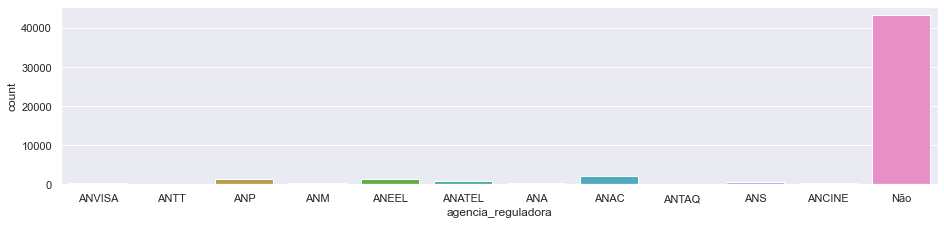

In [52]:
sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.countplot(x='agencia_reguladora', data=df)

#### Campo ano

In [67]:
df["ano"].value_counts().rename_axis('ano').reset_index(name='Qtd')

,ano,Qtd
0,1988,2041
1,1987,1853
2,1986,1834
3,1989,1827
4,1990,1550
...,...,...
68,1978,283
69,1963,245
70,1962,169
71,1950,141


<AxesSubplot:xlabel='ano', ylabel='count'>

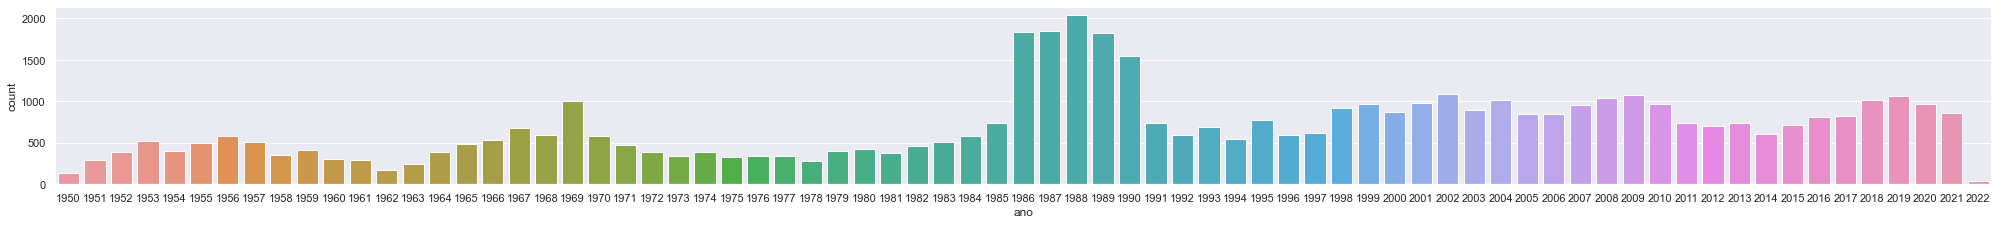

In [55]:
sns.set(rc={'figure.figsize':(34.7,3.27)})
sns.countplot(x='ano', data=df)

#### Campo tipo_lei

In [68]:
df["tipo_lei"].value_counts().rename_axis('tipo_lei').reset_index(name='Qtd')

,tipo_lei,Qtd
0,Decreto,25677
1,Lei ordinária,12927
2,Portaria,4095
3,Resolução,3010
4,Decreto-Lei,2480
5,Medida provisória,1651
6,Intrução normativa,609
7,Lei Complementar,180
8,Lei_ordinaria,170
9,Emenda Constitucional,109


<AxesSubplot:xlabel='tipo_lei', ylabel='count'>

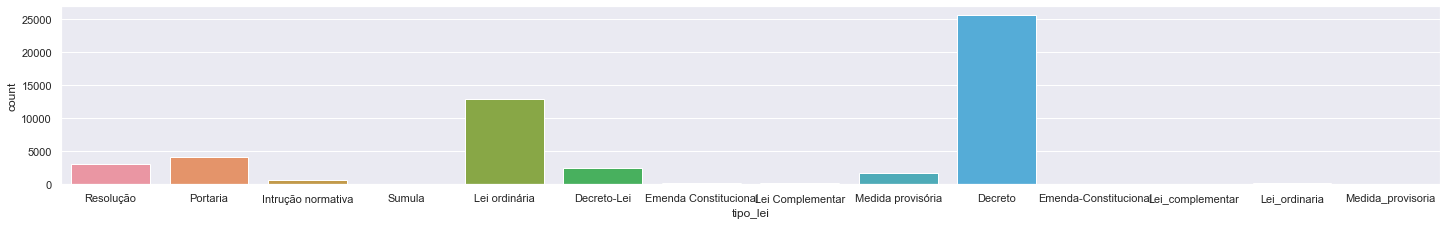

In [69]:
sns.set(rc={'figure.figsize':(24.7,3.27)})
sns.countplot(x='tipo_lei', data=df)

#### Campo situacao

In [11]:
dfPlot = df["situacao"].value_counts().rename_axis('situacao').reset_index(name='Qtd')
dfPlot

,situacao,Qtd
0,Não consta revogação expressa,29119
1,Revogado,19144
2,Convertida,789
3,Revogada,672
4,Reedição convertida,273
5,Originária convertida,150
6,sem situação,141
7,Não consta revogação expressa (ver campo alter...,136
8,Vigência encerrada,127
9,Sem eficácia,82


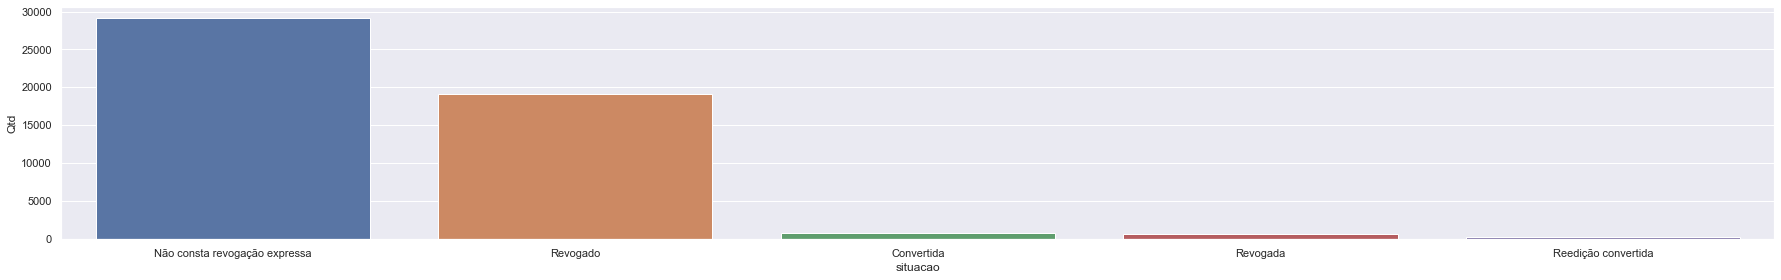

In [20]:
sns.set(rc={'figure.figsize':(30.7,4.27)})
g = sns.barplot(x='situacao',y="Qtd",data=dfPlot.head(5))
#g.set_xticklabels(g.get_xticklabels(), rotation=30)

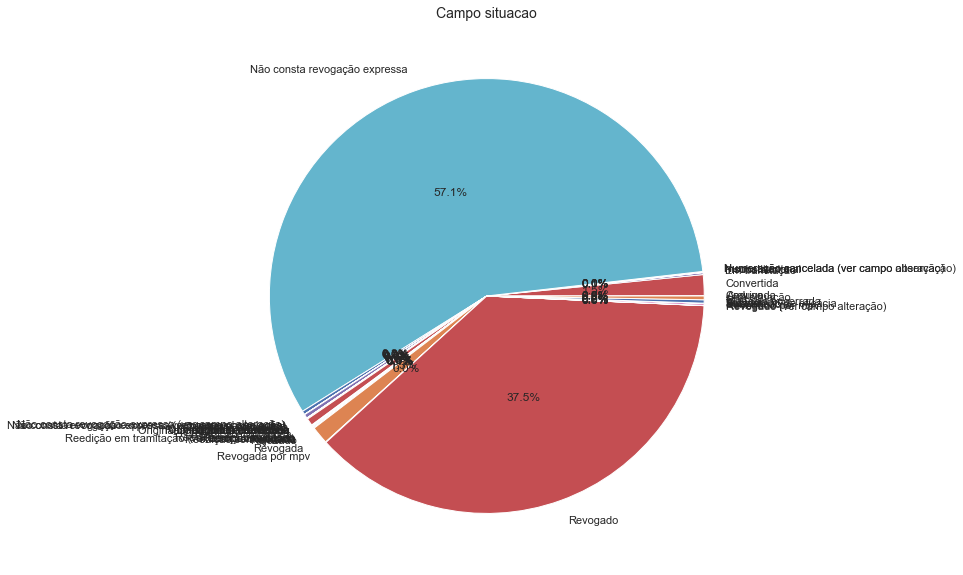

In [43]:
data = dfPlot.groupby("situacao")["Qtd"].sum()

pie, ax = plt.subplots(figsize=[10,10])
labels = data.keys()
plt.pie(x=data,autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Campo situacao", fontsize=14);
pie.savefig("situacao.png")